In [1]:
#Importing Libraries 
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
TitanicData  = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
TitanicData.shape

(891, 12)

In [3]:
TitanicData


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#Exploratory Data Analysis (EDA)
TitanicData.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
TitanicData =TitanicData.drop(["PassengerId", "Name"], axis=1)

In [6]:
TitanicData

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [7]:
#Missing null values check
TitanicData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
#Observation:

#'Age', 'Embarked', and 'Cabin' have null values.

#19% of 'Age' data is null value,0.22% of 'Embarked' is null value, while 77.10% 'Cabin' data is null value.

#Dropping 'Cabin' since 77.10% of its values is missing and therefore it cannot contribute to building a good model for predicting the target variable values.

TitanicData = TitanicData.drop("Cabin", axis=1)
TitanicData

In [9]:
#Getting the basic summary and statistical information of the data
TitanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [10]:
TitanicData.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [ ]:
TitanicData


In [11]:
TitanicData.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#A higher Std than mean in 'Fare' column indicates postive skewness.

In [13]:
#checking for unique elements in each of the column

TitanicData.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

In [14]:
#checking for unique elements in each of the column

TitanicData.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

In [15]:
TitanicData['Survived'].unique()

array([0, 1], dtype=int64)

In [16]:
TitanicData['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

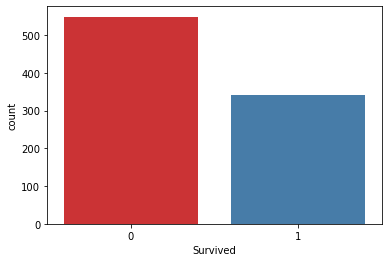

In [17]:
# Checking for Class Imbalance

sns.countplot(TitanicData['Survived'], palette="Set1")

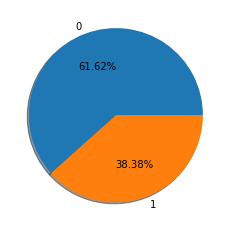

In [19]:
labels = '0','1'
fig, ax = plt.subplots()
ax.pie(TitanicData['Survived'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()


In [20]:
#Analyzing Feature column Catergorical Classes
TitanicData['Sex'].unique() 

array(['male', 'female'], dtype=object)

In [21]:
TitanicData['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

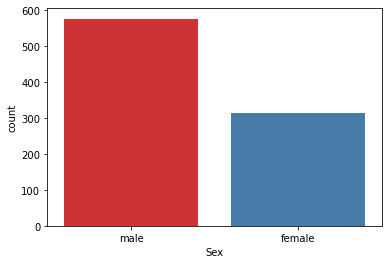

In [22]:
sns.countplot(TitanicData['Sex'], palette="Set1")

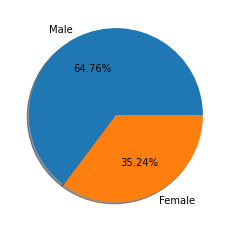

In [23]:
labels = 'Male','Female'
fig, ax = plt.subplots()
ax.pie(TitanicData['Sex'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

In [24]:
TitanicData['Pclass'].unique() 

array([3, 1, 2], dtype=int64)

In [25]:
TitanicData['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

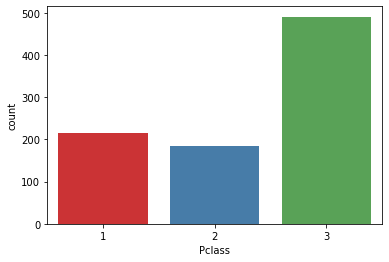

In [26]:
sns.countplot(TitanicData['Pclass'], palette="Set1")

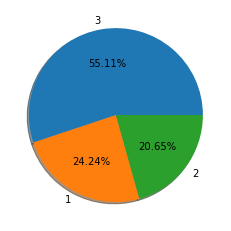

In [27]:
labels = '3','1','2'
fig, ax = plt.subplots()
ax.pie(TitanicData['Pclass'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

In [29]:
TitanicData['Embarked'].unique() 

array(['S', 'C', 'Q', nan], dtype=object)

In [30]:
TitanicData['Embarked'].isnull().sum()

2

In [31]:
TitanicData.loc[pd.isna(TitanicData["Embarked"]), :].index

Int64Index([61, 829], dtype='int64')

In [32]:
TitanicData.drop([61,829],inplace=True)

In [33]:
TitanicData.shape

(889, 9)

In [34]:
TitanicData.reset_index(drop=True,inplace = True)

In [35]:
TitanicData['Embarked'].isnull().sum() 

0

In [36]:
TitanicData['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

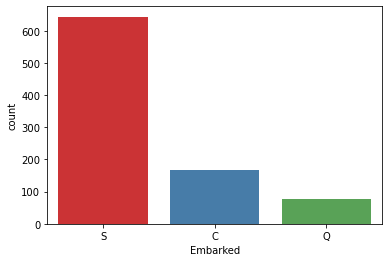

In [37]:
sns.countplot(TitanicData['Embarked'], palette="Set1")

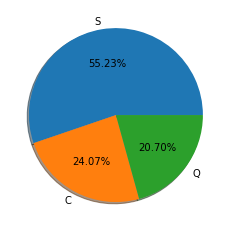

In [38]:
labels = 'S','C','Q'
fig, ax = plt.subplots()
ax.pie(TitanicData['Pclass'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

In [39]:
TitanicData['Sex'] = TitanicData.Sex.map({'female':0,'male':1})

In [41]:
dumm = pd.get_dummies(TitanicData['Embarked'],drop_first = False)

In [42]:
dumm 

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
884,0,0,1
885,0,0,1
886,0,0,1
887,1,0,0


In [43]:
TitanicData = TitanicData.join(dumm)

In [44]:
TitanicData.drop(columns = ['Embarked'],axis = 1, inplace = True)

In [45]:
TitanicData

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,0,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,1,0,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,0,35.0,1,0,113803,53.1000,0,0,1
4,0,3,1,35.0,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,211536,13.0000,0,0,1
885,1,1,0,19.0,0,0,112053,30.0000,0,0,1
886,0,3,0,NaN,1,2,W./C. 6607,23.4500,0,0,1
887,1,1,1,26.0,0,0,111369,30.0000,1,0,0


In [46]:
 TitanicData.drop(columns = ['Ticket'],inplace = True)   

In [47]:
 TitanicData

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,0,0,1
885,1,1,0,19.0,0,0,30.0000,0,0,1
886,0,3,0,NaN,1,2,23.4500,0,0,1
887,1,1,1,26.0,0,0,30.0000,1,0,0


<AxesSubplot:xlabel='Age'>

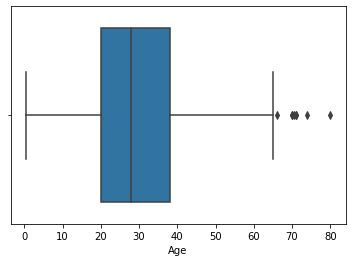

In [48]:
#Filling NaN values in 'Age' column
sns.boxplot(TitanicData['Age'])

In [49]:
#Using KNN Imputation technique for imputing missing data.
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=2)
TitanicData_new= TitanicData.copy()

In [50]:
TitanicData_new = imp.fit_transform(TitanicData_new[['Sex','Age']])

In [51]:
TitanicData_new 

array([[ 1., 22.],
       [ 0., 38.],
       [ 0., 26.],
       ...,
       [ 0., 32.],
       [ 1., 26.],
       [ 1., 32.]])

In [52]:
type(TitanicData_new)

numpy.ndarray

In [53]:
TitanicData_new = pd.DataFrame(TitanicData_new, columns=['Sex','Age'])

In [54]:
TitanicData_new.index = TitanicData.index

In [55]:
TitanicData[['Age','Sex']] = TitanicData_new[['Age','Sex']]

In [57]:
TitanicData['Age'].isnull().sum()

0

In [58]:
#Finding Correlation
t_corr = TitanicData.corr()
t_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
Survived,1.000000,-0.335549,-0.541585,-0.061387,-0.034040,0.083151,0.255290,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,0.127741,-0.327795,0.081656,0.016824,-0.548193,-0.245733,0.220558,0.076466
Sex,-0.541585,0.127741,1.000000,0.065452,-0.116348,-0.247508,-0.179958,-0.084520,-0.075217,0.121405
Age,-0.061387,-0.327795,0.065452,1.000000,-0.225819,-0.173839,0.091212,0.034131,-0.004313,-0.027190
SibSp,-0.034040,0.081656,-0.116348,-0.225819,1.000000,0.414542,0.160887,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.247508,-0.173839,0.414542,1.000000,0.217532,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,-0.179958,0.091212,0.160887,0.217532,1.000000,0.270731,-0.116684,-0.163758
C,0.169966,-0.245733,-0.084520,0.034131,-0.060074,-0.011588,0.270731,1.000000,-0.148646,-0.782613
Q,0.004536,0.220558,-0.075217,-0.004313,-0.026692,-0.081585,-0.116684,-0.148646,1.000000,-0.499261
S,-0.151777,0.076466,0.121405,-0.027190,0.069438,0.061512,-0.163758,-0.782613,-0.499261,1.000000


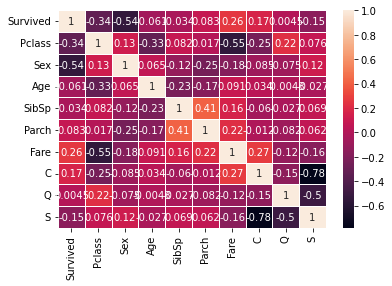

In [59]:
plt.figure
sns.heatmap(t_corr,annot=True,linewidth=1)
plt.show()

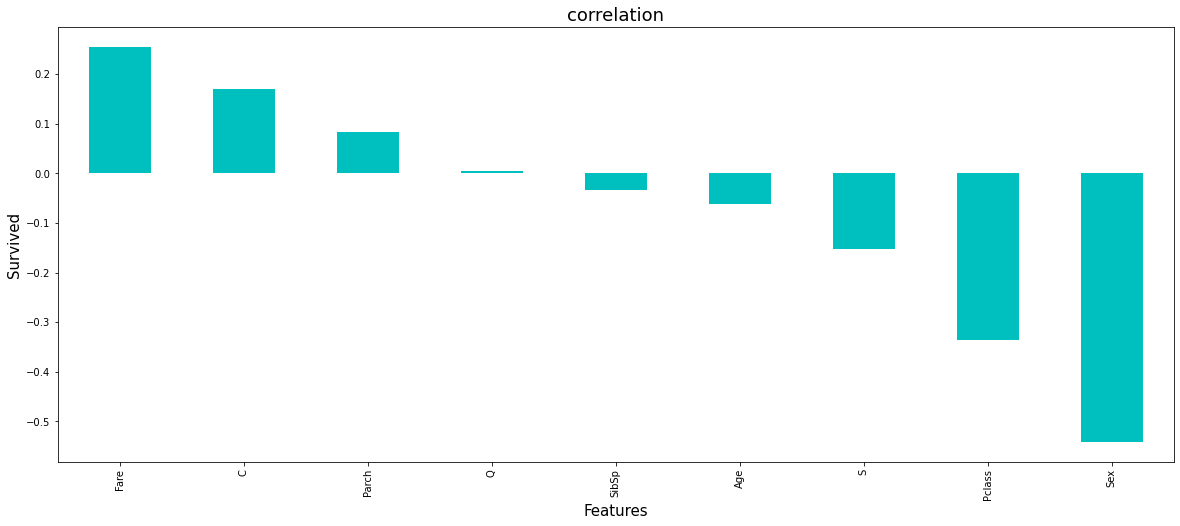

In [60]:
plt.figure(figsize = (20,8))
TitanicData.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

In [61]:
X = TitanicData.drop(columns = ['Survived'])
y = TitanicData['Survived']

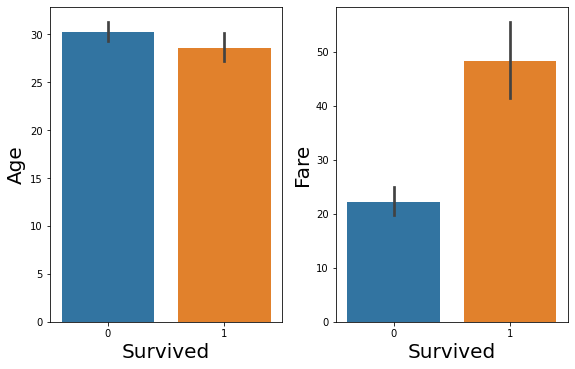

In [63]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = TitanicData['Survived']
X = TitanicData[['Age','Fare']]
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Survived',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

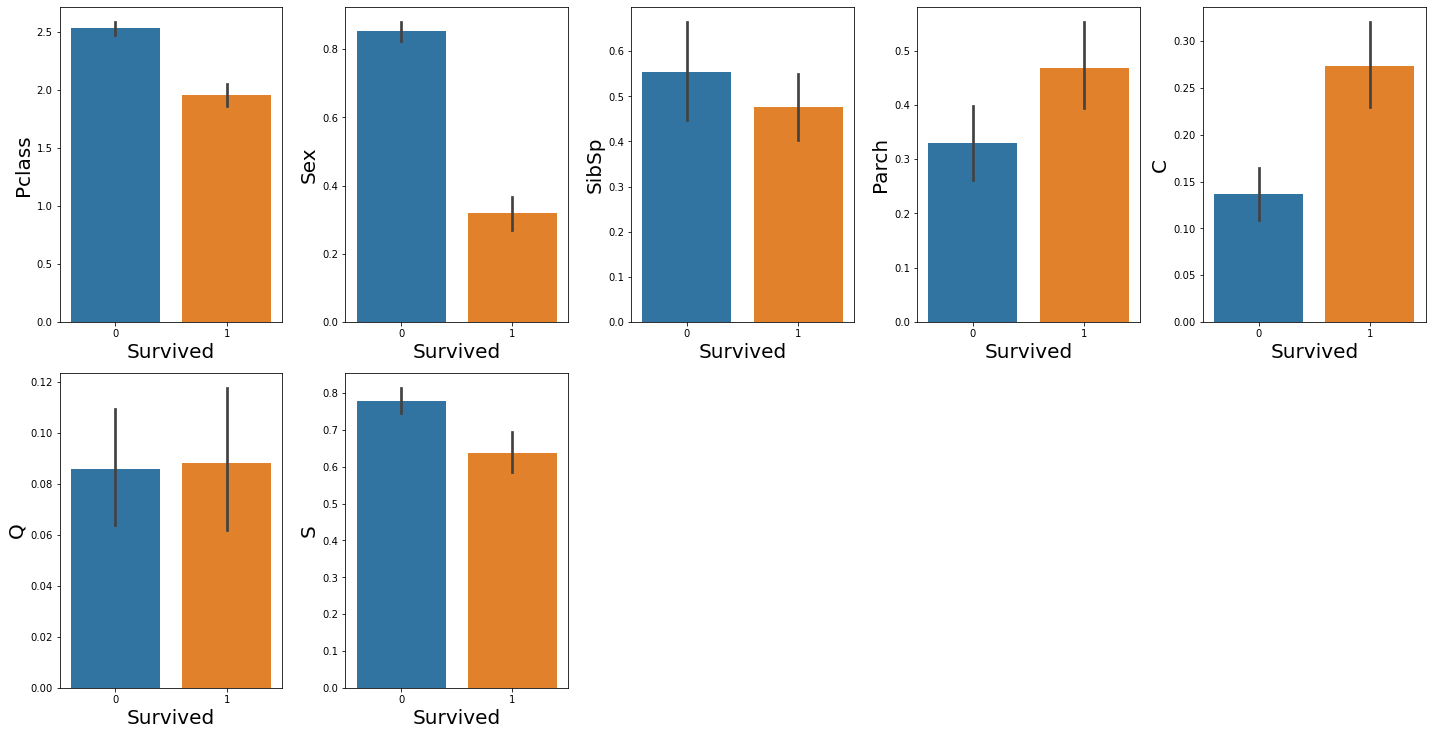

In [64]:
#'Survived' vs Categorical/Discrete Data Columns

plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = TitanicData['Survived']
X = TitanicData.drop(columns=['Survived','Age','Fare'])
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Survived',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

In [65]:
TitanicData['Families'] = TitanicData['Parch']+TitanicData['SibSp']

In [66]:
TitanicData['Families']

0      1
1      1
2      0
3      1
4      0
      ..
884    0
885    0
886    3
887    0
888    0
Name: Families, Length: 889, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

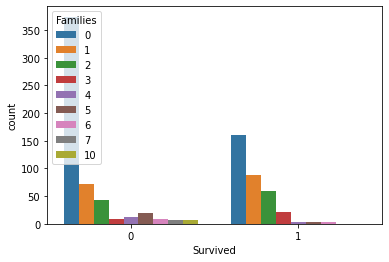

In [68]:
sns.countplot(y, hue =TitanicData['Families'])

In [69]:
#Dropping columns 'SibSp' and 'Parch'
TitanicData.drop(columns=['SibSp','Parch'],inplace=True )

<AxesSubplot:xlabel='Survived', ylabel='count'>

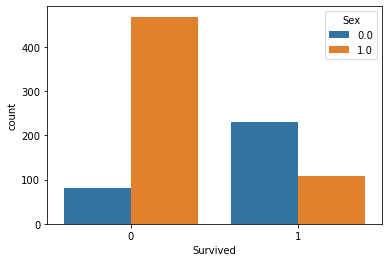

In [70]:
sns.countplot(y, hue =TitanicData['Sex'])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

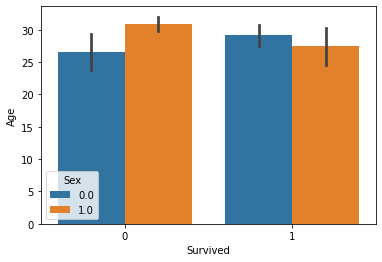

In [71]:
sns.barplot(x =TitanicData['Survived'],y = TitanicData['Age'], hue = TitanicData['Sex'])

In [72]:
TitanicData

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Families
0,0,3,1.0,22.0,7.2500,0,0,1,1
1,1,1,0.0,38.0,71.2833,1,0,0,1
2,1,3,0.0,26.0,7.9250,0,0,1,0
3,1,1,0.0,35.0,53.1000,0,0,1,1
4,0,3,1.0,35.0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...
884,0,2,1.0,27.0,13.0000,0,0,1,0
885,1,1,0.0,19.0,30.0000,0,0,1,0
886,0,3,0.0,32.0,23.4500,0,0,1,3
887,1,1,1.0,26.0,30.0000,1,0,0,0


In [73]:
X = TitanicData.drop(columns = ['Survived'])
y = TitanicData['Survived']    

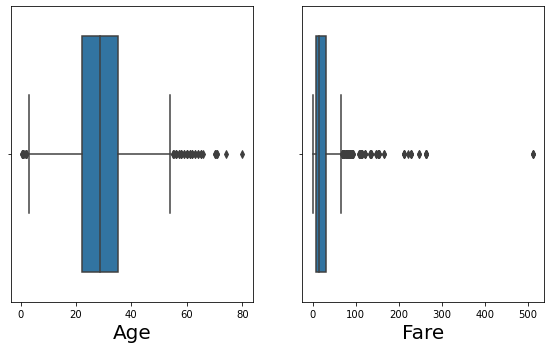

In [74]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
feat= ['Age','Fare']
for col in X[feat]:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()    

In [75]:
df2 = X[feat].copy()

In [77]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)
df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [78]:
df3.shape

(862, 2)

In [79]:
df2.shape       

(889, 2)

In [80]:
#Data loss % check
loss = (889-862)/889*100

In [81]:
loss

3.0371203599550056

In [82]:
df =X[feat].copy()

In [83]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)

In [84]:
indxdrop 

array([  7.,  11.,  15.,  16.,  33.,  54.,  77.,  93.,  95., 115., 118.,
       151., 163., 169., 171., 173., 182., 194., 204., 231., 251., 267.,
       274., 279., 296., 304., 325., 339., 365., 380., 385., 437., 455.,
       466., 468., 478., 482., 486., 491., 492., 529., 544., 554., 569.,
       586., 624., 625., 629., 641., 643., 646., 658., 671., 683., 693.,
       744., 754., 771., 787., 802., 823., 826., 829., 849., 877.,   1.,
        27.,  31.,  34.,  52.,  61.,  71.,  87., 101., 117., 119., 123.,
       138., 150., 158., 179., 194., 200., 214., 217., 223., 229., 244.,
       255., 256., 257., 261., 267., 268., 274., 289., 290., 296., 298.,
       304., 305., 306., 309., 310., 317., 318., 323., 324., 331., 333.,
       335., 336., 340., 365., 368., 372., 374., 376., 379., 384., 389.,
       392., 411., 434., 437., 444., 452., 483., 485., 495., 497., 503.,
       504., 519., 526., 536., 539., 543., 549., 556., 557., 580., 584.,
       586., 590., 608., 626., 640., 644., 654., 65

In [85]:
df = df.drop(indxdrop)

In [86]:
df.shape

(721, 2)

In [87]:
loss=(889-721)/889 * 100
loss   

18.89763779527559

In [88]:
dropindx = X.index.difference(df3.index)

In [89]:
dropindx

Int64Index([ 27,  87,  95, 115, 117, 257, 298, 310, 340, 376, 379, 437, 492,
            526, 556, 629, 671, 678, 688, 699, 715, 729, 736, 741, 744, 778,
            849],
           dtype='int64')

In [90]:
TitanicData.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [91]:
X = TitanicData.drop(columns = ['Survived'])
y = TitanicData['Survived']

In [92]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
C           0
Q           0
S           0
Families    0
dtype: int64

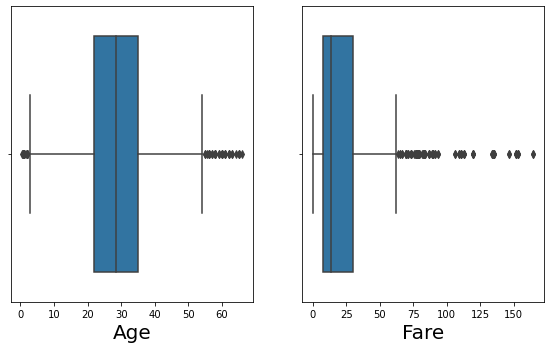

In [93]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
feat= ['Age','Fare']
for col in X[feat]:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [94]:
X[feat].skew()

Age     0.238238
Fare    2.279424
dtype: float64

In [95]:
(X[feat]==0).sum()

Age      0
Fare    15
dtype: int64

In [96]:
# Using KNN Imputation technique for imputing missing data.
imp = KNNImputer(n_neighbors=2)

In [97]:
X_filled = X.copy()

In [98]:
X_filled = imp.fit_transform(X_filled[['Pclass','Fare']])

In [99]:
X_filled

array([[ 3.    ,  7.25  ],
       [ 1.    , 71.2833],
       [ 3.    ,  7.925 ],
       ...,
       [ 3.    , 23.45  ],
       [ 1.    , 30.    ],
       [ 3.    ,  7.75  ]])

In [100]:
type(X_filled)

numpy.ndarray

In [101]:
X_filled = pd.DataFrame(X_filled, columns=['Pclass','Fare']) #to convert numpy array back into dataframe

In [102]:
X_filled.index = X.index

In [103]:
X['Fare'].isnull().sum()

0

In [104]:
X.skew()

Pclass     -0.715372
Sex        -0.639189
Age         0.238238
Fare        2.279424
C           1.680697
Q           2.910027
S          -1.056235
Families    2.802387
dtype: float64

In [105]:
from sklearn.preprocessing import PowerTransformer

In [106]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)
df4 = X[['Fare','Families']]
transformed= powtrans.fit_transform(df4)
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe
transformed.skew()

Fare       -0.009414
Families    0.546482
dtype: float64

In [107]:
transformed.index = X.index
X[['Fare','Families']] = transformed[['Fare','Families']]
X.skew()

Pclass     -0.715372
Sex        -0.639189
Age         0.238238
Fare       -0.009414
C           1.680697
Q           2.910027
S          -1.056235
Families    0.546482
dtype: float64

In [108]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
C           0
Q           0
S           0
Families    0
dtype: int64

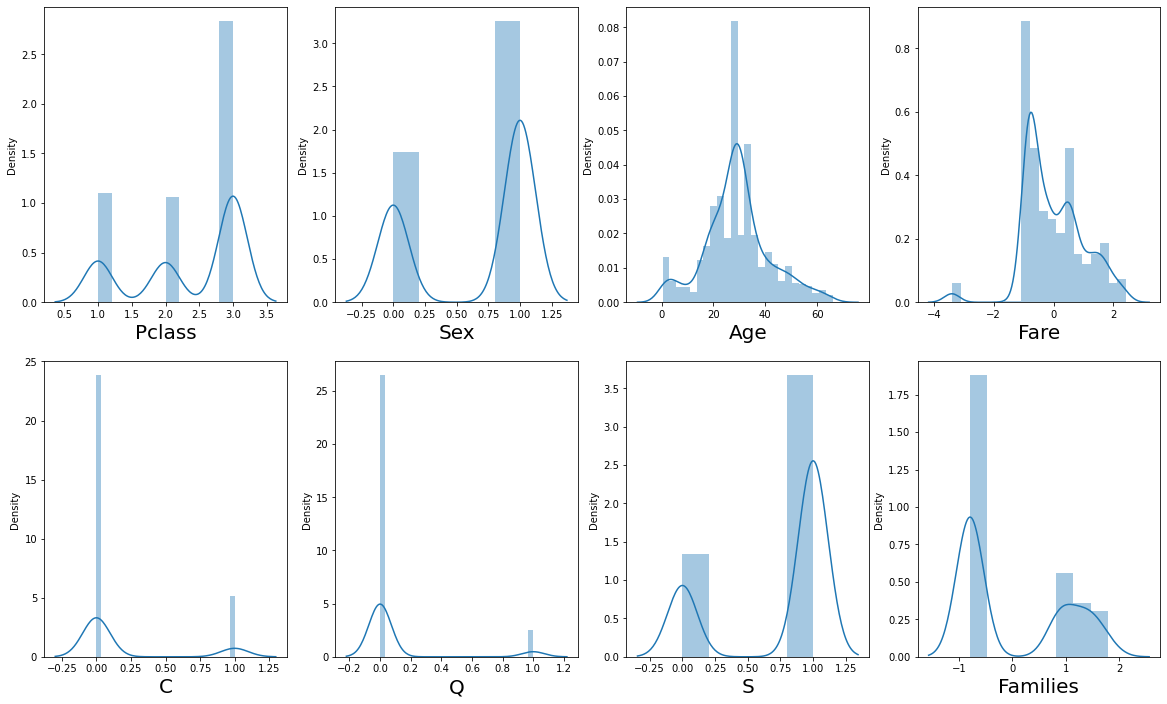

In [109]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [114]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X 

array([[ 0.7994893 ,  0.73062154, -0.58138018, ..., -0.31095355,
         0.60326118,  0.90850781],
       [-1.64868042, -1.36869768,  0.702247  , ..., -0.31095355,
        -1.65765681,  0.90850781],
       [ 0.7994893 , -1.36869768, -0.26047338, ..., -0.31095355,
         0.60326118, -0.79210461],
       ...,
       [ 0.7994893 , -1.36869768,  0.22088681, ..., -0.31095355,
         0.60326118,  1.52047922],
       [-1.64868042,  0.73062154, -0.26047338, ..., -0.31095355,
        -1.65765681, -0.79210461],
       [ 0.7994893 ,  0.73062154,  0.22088681, ...,  3.21591437,
        -1.65765681, -0.79210461]])

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Pclass,2.090198
1,Sex,1.143503
2,Age,1.205194
3,Fare,2.514240
4,C,inf
5,Q,inf
6,S,inf
7,Families,1.656581


In [117]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat = SelectKBest(score_func = f_classif, k = 8)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(11,'Score'))

    Feature       Score
1       Sex  339.693591
0    Pclass  105.325560
3      Fare   97.228558
7  Families   28.326530
4         C   23.201391
6         S   19.167697
2       Age    2.575024
5         Q    0.111014


In [118]:
from sklearn.model_selection import train_test_split

In [119]:
#Finding the best random state
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .31, random_state = i,stratify = y)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8544776119402985 on random_state: 15


In [120]:
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .31, stratify = y,random_state = 16)

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [123]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC()
KNN = KNeighborsClassifier() 

In [124]:
#Training the Models
DTC.fit(x_train,y_train)
RFC.fit(x_train,y_train)
SV.fit(x_train,y_train)
LOGR.fit(x_train,y_train)
KNN.fit(x_train,y_train) 

KNeighborsClassifier()

In [125]:
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)
conf_matrx = confusion_matrix(y_test,DTCpred)

In [126]:
print(accu)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       167
           1       0.77      0.78      0.77       101

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [127]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)
conf_matrx = confusion_matrix(y_test,LOGRpred)

In [128]:
print(accu) 

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       167
           1       0.80      0.77      0.78       101

    accuracy                           0.84       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268



In [129]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)
conf_matrx = confusion_matrix(y_test,RFCpred)

In [130]:
conf_matrx

array([[148,  19],
       [ 20,  81]], dtype=int64)

In [131]:
print(accu)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       167
           1       0.81      0.80      0.81       101

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



In [135]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx

array([[161,   6],
       [ 34,  67]], dtype=int64)

In [133]:
print(accu)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       167
           1       0.92      0.66      0.77       101

    accuracy                           0.85       268
   macro avg       0.87      0.81      0.83       268
weighted avg       0.86      0.85      0.84       268



In [134]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)
conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[154,  13],
       [ 30,  71]], dtype=int64)

In [136]:
print(accu)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       167
           1       0.92      0.66      0.77       101

    accuracy                           0.85       268
   macro avg       0.87      0.81      0.83       268
weighted avg       0.86      0.85      0.84       268



In [137]:
from sklearn.model_selection import cross_val_score as cvs

In [138]:
# Decision Tree Classifier
print(cvs(DTC,scaled_X,y,cv=5).mean())  

0.7761325446968679


In [139]:
#Logistic Regression
print(cvs(LOGR,scaled_X,y,cv=5).mean()) 

0.7888560290361608


In [140]:
#Random Forest Classifier
print(cvs(RFC,scaled_X,y,cv=5).mean())

0.802822960075279


In [141]:
#SV Classifier
print(cvs(SV,scaled_X,y,cv=5).mean())

0.8155464444145718


In [142]:
#K Nearest Neighbours Classifier
print(cvs(KNN,scaled_X,y,cv=5).mean())

0.8121857776582875


In [143]:
#Decision Tree Classifier
roc_auc_score(y_test,DTCpred)

0.8192328214857414

In [144]:
#Logistic Regression
roc_auc_score(y_test,LOGRpred)

0.826258374340428

In [145]:
#Random Forest Classifier
roc_auc_score(y_test,RFCpred)

0.8441038714649909

In [146]:
#SV Classifier
roc_auc_score(y_test,SVpred)

0.8137190964605443

In [147]:
 #K Nearest Neighbours Classifier
roc_auc_score(y_test,KNNpred) 

0.8125629928262287

In [148]:
#Random Forest Classifier is the best model for the dataset, with roc_auc_score 0.8441

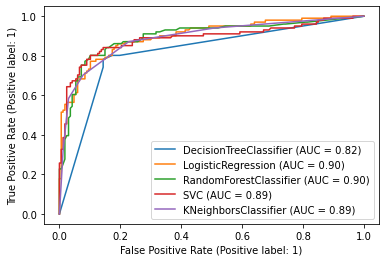

In [149]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,SV,KNN]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

In [150]:
from sklearn.model_selection import GridSearchCV

In [153]:
#Random Forest Classifier
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]})

In [159]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 30}

In [154]:
Best_mod1 = RandomForestClassifier(n_estimators = 60,criterion = 'gini', max_depth= 10, max_features = 'log2',min_samples_leaf = 5, min_samples_split = 2)
Best_mod1.fit(x_train,y_train)
rfpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

85.82089552238806


In [160]:
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

array([[155,  12],
       [ 26,  75]], dtype=int64)

In [161]:
cr = classification_report(y_test,rfpred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       167
           1       0.86      0.74      0.80       101

    accuracy                           0.86       268
   macro avg       0.86      0.84      0.84       268
weighted avg       0.86      0.86      0.86       268



In [162]:
import joblib
joblib.dump(Best_mod1,"BestModelTitanic.pkl")

['BestModelTitanic.pkl']

In [163]:
mod=joblib.load("BestModelTitanic.pkl")

In [164]:
print(mod.predict(x_test))

[0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1
 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 1 0 0 1]
